In [1]:
import pandas as pd
import numpy as np
from scipy.stats import *
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
home_health_care = pd.read_csv("Home_Health_Care_Agencies.csv")
home_health_care.head()

,State,CMS Certification Number (CCN)*,Provider Name,Address,City,Zip,Phone,Type of Ownership,Offers Nursing Care Services,Offers Physical Therapy Services,...,Footnote for how often patients got better at taking their drugs correctly by mouth,How often home health patients had to be admitted to the hospital,Footnote for how often home health patients had to be admitted to the hospital,"How often patients receiving home health care needed urgent, unplanned care in the ER without being admitted","Footnote for how often patients receiving home health care needed urgent, unplanned care in the ER without being admitted","How often home health patients, who have had a recent hospital stay, had to be re-admitted to the hospital","Footnote for how often home health patients, who have had a recent hospital stay, had to be re-admitted to the hospital","How often home health patients, who have had a recent hospital stay, received care in the hospital emergency room without being re-admitted to the hospital","Footnote for how often home health patients, who have had a recent hospital stay, received care in the hospital emergency room without being re-admitted to the hospital",Footnote
0,AL,17000,BUREAU OF HOME & COMMUNITY SERVICES,"201 MONROE STREET, THE RSA TOWER, SUITE 1200",MONTGOMERY,36104,3342065341,Government - State/ County,True,True,...,This measure currently does not have data or p...,NaN,This measure currently does not have data or p...,NaN,This measure currently does not have data or p...,Not Available,This measure currently does not have data or p...,Not Available,This measure currently does not have data or p...,
1,AL,17008,JEFFERSON COUNTY HOME CARE,2201 ARLINGTON AVENUE,BESSEMER,35020,2059169500,Government - State/ County,True,True,...,NaN,14.1,NaN,17.1,NaN,Not Available,The number of patient episodes for this measur...,Not Available,The number of patient episodes for this measur...,
2,AL,17009,ALACARE HOME HEALTH & HOSPICE,2970 LORNA ROAD,BIRMINGHAM,35216,2058242680,Proprietary,True,True,...,NaN,18.8,NaN,10.5,NaN,Worse Than Expected,NaN,Worse Than Expected,NaN,
3,AL,17013,GENTIVA HEALTH SERVICES,1239 RUCKER BLVD,ENTERPRISE,36330,3343470234,Proprietary,True,True,...,NaN,18.7,NaN,14.2,NaN,Worse Than Expected,NaN,Same As Expected,NaN,
4,AL,17014,AMEDISYS HOME HEALTH,68278 MAIN STREET,BLOUNTSVILLE,35031,2054294919,Proprietary,True,True,...,NaN,15.0,NaN,10.8,NaN,Same As Expected,NaN,Same As Expected,NaN,


In [3]:
hhc_required_col = home_health_care.filter(['State','Offers Physical Therapy Services','Offers Occupational Therapy Services', 'Offers Speech Pathology Services'], axis=1)

In [4]:
hhc_required_col.head()

,State,Offers Physical Therapy Services,Offers Occupational Therapy Services,Offers Speech Pathology Services
0,AL,True,True,True
1,AL,True,True,True
2,AL,True,True,True
3,AL,True,True,False
4,AL,True,True,True


In [5]:
hhc_req_CA_FL = hhc_required_col[hhc_required_col['State'].str.contains('FL|CA')]
hhc_req_CA_FL.head(16)

,State,Offers Physical Therapy Services,Offers Occupational Therapy Services,Offers Speech Pathology Services
434,CA,True,True,True
442,CA,True,True,True
448,CA,True,True,False
449,CA,True,True,True
463,CA,True,True,True
464,CA,True,True,True
484,CA,True,True,True
505,CA,True,True,True
512,CA,True,True,True
513,CA,True,True,True


In [6]:
n_CA_FL = hhc_req_CA_FL.shape[0]
n_CA_FL

2397

In [7]:
def calc_mean(df, state):
    mean_physical = df["Offers Physical Therapy Services"].mean()
    mean_occupational = df["Offers Occupational Therapy Services"].mean()
    mean_speech = df["Offers Speech Pathology Services"].mean()
    print("Persentase Home Healthcare di {} yang memiliki layanan Physical Therapy = {}%".format(state, mean_physical * 100))
    print("Persentase Home Healthcare di {} yang memiliki layanan Occupational Therapy = {}%".format(state, mean_occupational * 100))
    print("Persentase Home Healthcare di {} yang memiliki layanan Speech Pathology = {}%".format(state , mean_speech * 100))

In [8]:
def tstudent(n, p, dof, mean, std):
    t_value = t.ppf(p, dof)
    # p = t.cdf(t_value, dof)
    margin_of_error = t_value * std / np.sqrt(n)
    
    lowbound = mean - margin_of_error
    upbound = mean + margin_of_error

    return lowbound, upbound, t_value

<h2> Dataframe California dan Florida

<h2> Menghitung Rataan dan Standard Deviation Florida dan California

In [9]:
hhc_req_CA_FL.replace({False:0, True:1}, inplace = True)
hhc_req_CA_FL["Total services points"] = hhc_req_CA_FL["Offers Physical Therapy Services"] + hhc_req_CA_FL["Offers Occupational Therapy Services"] + hhc_req_CA_FL["Offers Speech Pathology Services"]
hhc_req_CA_FL.head()

E:\Anaconda\envs\tf-gpu\lib\site-packages\pandas\core\frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(
<ipython-input-9-09bf7e3b94d8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hhc_req_CA_FL["Total services points"] = hhc_req_CA_FL["Offers Physical Therapy Services"] + hhc_req_CA_FL["Offers Occupational Therapy Services"] + hhc_req_CA_FL["Offers Speech Pathology Services"]


,State,Offers Physical Therapy Services,Offers Occupational Therapy Services,Offers Speech Pathology Services,Total services points
434,CA,1,1,1,3
442,CA,1,1,1,3
448,CA,1,1,0,2
449,CA,1,1,1,3
463,CA,1,1,1,3


In [10]:
hhc_CA_FL_allservice = hhc_req_CA_FL.filter(["Total services points"], axis = 1)
hhc_CA_FL_allservice.replace({1:0, 2:0, 3:1}, inplace = True)
hhc_CA_FL_allservice.head(10)

,Total services points
434,1
442,1
448,0
449,1
463,1
464,1
484,1
505,1
512,1
513,1


In [11]:
calc_mean(hhc_req_CA_FL, "California dan Florida")

Persentase Home Healthcare di California dan Florida yang memiliki layanan Physical Therapy = 98.87359198998749%
Persentase Home Healthcare di California dan Florida yang memiliki layanan Occupational Therapy = 96.03671255736337%
Persentase Home Healthcare di California dan Florida yang memiliki layanan Speech Pathology = 90.02920317062996%


In [12]:
p = hhc_CA_FL_allservice.mean()
print("Persentase Home Healthcare yang memiliki semua layanan di California dan FLorida adalah = {}%".format(p[0]))

Persentase Home Healthcare yang memiliki semua layanan di California dan FLorida adalah = 0.8915310805173133%


In [13]:
# hhc_CA_FL_allservice.std()

In [14]:
std_binom = (p[0]*(1-p[0])*n_CA_FL)**0.5
print("Standar Deviasi Home Healthcare yang memiliki semua layanan di California dan Florida adalah = {}".format(std_binom))

Standar Deviasi Home Healthcare yang memiliki semua layanan di California dan Florida adalah = 15.224916450821706


<h2> Dataframe California

<h2> Menghitung Rataan dan Standard Deviation California State

In [15]:
hhc_req_CA = hhc_req_CA_FL[hhc_req_CA_FL['State'].str.contains('CA')]
hhc_req_CA.head(16)

,State,Offers Physical Therapy Services,Offers Occupational Therapy Services,Offers Speech Pathology Services,Total services points
434,CA,1,1,1,3
442,CA,1,1,1,3
448,CA,1,1,0,2
449,CA,1,1,1,3
463,CA,1,1,1,3
464,CA,1,1,1,3
484,CA,1,1,1,3
505,CA,1,1,1,3
512,CA,1,1,1,3
513,CA,1,1,1,3


In [16]:
n_CA = hhc_req_CA.shape[0]
n_CA
# tval = t.ppf(0.95, n_CA-1)
# tval

1314

In [17]:
calc_mean(hhc_req_CA, "California")

Persentase Home Healthcare di California yang memiliki layanan Physical Therapy = 98.4779299847793%
Persentase Home Healthcare di California yang memiliki layanan Occupational Therapy = 96.34703196347031%
Persentase Home Healthcare di California yang memiliki layanan Speech Pathology = 94.82496194824962%


In [18]:
hhc_CA_allservice = hhc_req_CA.filter(["Total services points"], axis = 1)
hhc_CA_allservice.replace({1:0, 2:0, 3:1}, inplace = True)

In [19]:
p2 = hhc_CA_allservice.mean()
print("Persentase Home Healthcare yang memiliki semua layanan di California adalah = {}".format(p2[0]))

Persentase Home Healthcare yang memiliki semua layanan di California adalah = 0.9398782343987824


In [20]:
std_binom2 = (p2[0]*(1-p2[0])*n_CA)**0.5
print("Standar Deviasi Home Healthcare yang memiliki semua layanan di California adalah = {}".format(std_binom2))

Standar Deviasi Home Healthcare yang memiliki semua layanan di California adalah = 8.61686604964379


<h2> Dataframe Florida

<h2> Menghitung Rataan dan Standard Deviasi Florida state

In [21]:
hhc_req_FL = hhc_req_CA_FL[hhc_req_CA_FL['State'].str.contains('FL')]
hhc_req_FL.head(16)

,State,Offers Physical Therapy Services,Offers Occupational Therapy Services,Offers Speech Pathology Services,Total services points
1317,FL,1,1,1,3
1377,FL,1,1,1,3
1387,FL,1,1,1,3
1616,FL,1,1,1,3
1650,FL,1,1,1,3
1918,FL,1,1,1,3
1982,FL,1,1,1,3
2004,FL,1,1,1,3
2011,FL,1,1,1,3
2012,FL,1,1,1,3


In [22]:
n_FL = hhc_req_FL.shape[0]
n_FL

1083

In [23]:
calc_mean(hhc_req_FL, "Florida")

Persentase Home Healthcare di Florida yang memiliki layanan Physical Therapy = 99.35364727608494%
Persentase Home Healthcare di Florida yang memiliki layanan Occupational Therapy = 95.66020313942751%
Persentase Home Healthcare di Florida yang memiliki layanan Speech Pathology = 84.21052631578947%


In [24]:
hhc_FL_allservice = hhc_req_FL.filter(["Total services points"], axis = 1)
hhc_FL_allservice.replace({1:0, 2:0, 3:1}, inplace = True)

In [25]:
p3 = hhc_FL_allservice.mean()
print("Persentase Home Healthcare yang memiliki semua layanan di Florida adalah = {}%".format(p3[0]))

Persentase Home Healthcare yang memiliki semua layanan di Florida adalah = 0.8328716528162512%


In [26]:
std_binom3 = (p3[0]*(1-p3[0])*n_FL)**0.5
print("Standar Deviasi Home Healthcare yang memiliki semua layanan di FLorida adalah = {}".format(std_binom3))

Standar Deviasi Home Healthcare yang memiliki semua layanan di FLorida adalah = 12.278019757263035


<h2> Uji Hipotesa bahwa banyak Home Healthcare yang memiliki ketiga layanan di CA dan FL adalah >= 95%

Null Hypothesis = Persentasi Home Healthcare di California dan Florida >= 95% <br>
Alternative Hypothesis = Persentasi Home Healthcare di California dan Florida < 95%

In [27]:
t_acuan = 1.645

In [28]:
num_of_healthcare_complete = hhc_CA_FL_allservice.mean()
mew_0 = 0.95
std = std_binom
akar_n = np.sqrt(n_CA_FL)

In [29]:
mean = hhc_CA_FL_allservice.mean()[0]
mean

0.8915310805173133

In [30]:
num_of_healthcare_complete

Total services points    0.891531
dtype: float64

In [31]:
std

15.224916450821706

In [32]:
akar_n

48.95916665957459

In [33]:
thasil = (num_of_healthcare_complete - mew_0) / (std/akar_n)
thasil[0]

-0.1880200513812084

In [76]:
if thasil[0] < -t_acuan:
    print("Alternative Hypothesis Accepted")
else:
    print("Null Hypothesis Accepted")

Null Hypothesis Accepted


In [35]:
lowbound, upbound, t_acuan = tstudent(n_CA_FL, 0.95, n_CA_FL - 1, num_of_healthcare_complete[0], std)
lowbound, upbound, t_acuan

(0.3798302690865759, 1.4032318919480509, 1.6454898381609784)

In [36]:
t1 = (lowbound - mew_0) / (std/akar_n)
t2 = (upbound - mew_0) / (std/akar_n)
t1, t2

(-1.8335098895421866, 1.4574697867797703)

<AxesSubplot:xlabel='Total services points', ylabel='Density'>

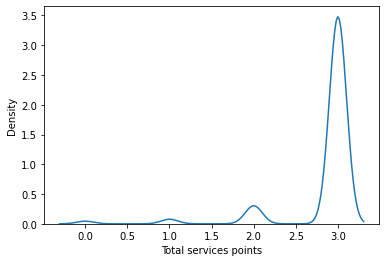

In [37]:
sns.kdeplot(hhc_req_CA_FL["Total services points"])

In [73]:
def draw_t_score(x, cond, mu, sigma, title, pos1, pos2, tex1, tex2, result):
    fig, ax = plt.subplots()
    y = norm.pdf(x, mu, sigma)
    t = x[cond]
    plt.plot(x, y)
    plt.fill_between(t, 0, norm.pdf(t, mu, sigma))
    plt.title(title)
    ax.annotate('Rejected Region', xy=(pos1, pos2), xytext=(tex1, tex2),
                   arrowprops=dict(facecolor='black', shrink=0.05))
    plt.axvline(x=result, color='g', label='t hasil')
    plt.legend()
    plt.show()

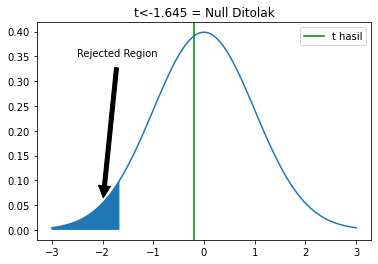

In [78]:
x = np.linspace(0 - 3, 0 + 3, 100)
draw_t_score(x, x<-t_acuan, 0, 1, "t<-1.645 = Null Ditolak", -2, 0.05, -2.5, 0.35, thasil[0])

<h2> Uji Hipotesa bahwa persentase Home Healthcare yang menyediakan 3 layanan di CA lebih besar secara signifikan dibanding FL

Null Hypothesis = Persentase Home Healthcare dengan 3 layanan di California >= 95% Home Healthcare di Florida <br>
Alternative Hypothesis = Persentase Home Healthcare dengan 3 layaan di California < dari Florida

In [40]:
n1 = n_CA
x1 = p2[0]
s1 = std_binom2

In [41]:
n2 = n_FL
x2 = p3[0]
s2 = std_binom3

In [42]:
a = (s1**2/n1)
b = (s2**2/n2)
c = (a**2)/(n1-1)
d = (b**2)/(n2-1)
dof = (a+b)**2/(c+d)
dof

1883.0639969656168

In [43]:
tacuan = 1.962

In [44]:
t_two_pop = ((x1-x2))/np.sqrt(a+b)
t_two_pop

0.2418861940650923

In [45]:
if t_two_pop < -tacuan:
    print("Alternative Hypothesis Accepted")
else:
    print("Null Hypothesis Accepted")

Null Hypothesis Accepted


<AxesSubplot:xlabel='Total services points', ylabel='Density'>

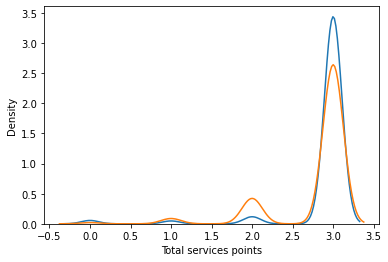

In [46]:
fig, ax = plt.subplots()
sns.kdeplot(hhc_req_CA["Total services points"], ax= ax)
sns.kdeplot(hhc_req_FL["Total services points"], ax= ax)

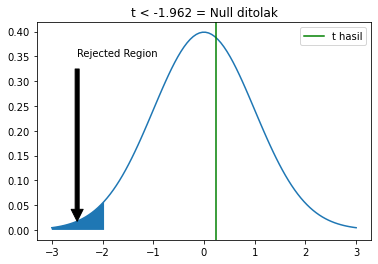

In [75]:
x = np.linspace(0 - 3, 0 + 3, 100)
draw_t_score(x, x<-tacuan, 0, 1, "t < -1.962 = Null ditolak", -2.5, 0, -2.5, 0.35, t_two_pop)

<h1> Pertanyaan Diskusi

<h1> 1

Berdasarkan tugas pemograman nomor 2 dimana kita menguji Hipotesa alternatif apakah Home Healthcare di California dan Florida yang memiliki 3 layanan diatas 95%, kita mendapati bahwa Hipotesa alternatif tersebut diterima. <br>
Hipotesa Alternatif tetap diterima walaupun rataan yang kita dapatkan mengenai banyaknya Home Heathcare yang memiliki 3 layanan adalah dibawah 95%. Hal ini dapat terjadi karena tingkat kepercayaan adalah 95%. <br>

Hal yang perlu diperhatikan Regulator adalah bahwa tidak semua negara bagian yang memiliki rata-rata sampel dibawah 95% memerlukan pendampigan. Perlu dilakukan uji hipotesa terlebih dahulu

<h1> 2

In [48]:
d2_df_temp = home_health_care[home_health_care["State"].str.contains('FL|CA')]
d2_df = d2_df_temp.filter(like='Services')
d2_df["State"] = d2_df_temp["State"].to_numpy().copy()
d2_df.head()

<ipython-input-48-53505f1c2daf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2_df["State"] = d2_df_temp["State"].to_numpy().copy()


,Offers Nursing Care Services,Offers Physical Therapy Services,Offers Occupational Therapy Services,Offers Speech Pathology Services,Offers Medical Social Services,Offers Home Health Aide Services,State
434,True,True,True,True,True,True,CA
442,True,True,True,True,True,True,CA
448,True,True,True,False,True,True,CA
449,True,True,True,True,True,True,CA
463,True,True,True,True,True,True,CA


<h2> Dataframe California

In [49]:
d2_df_CA = d2_df[d2_df["State"].str.contains('CA')]
d2_df_CA.replace({False:0, True:1}, inplace = True)
d2_df_CA['Total'] = d2_df_CA.iloc[:, 0:6].sum(axis = 1)

E:\Anaconda\envs\tf-gpu\lib\site-packages\pandas\core\frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(
<ipython-input-49-6bf6f368c02b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2_df_CA['Total'] = d2_df_CA.iloc[:, 0:6].sum(axis = 1)


In [50]:
d2_df_CA_total = d2_df_CA.filter(["Total"], axis = 1)
d2_df_CA_total.replace({1:0, 2:0, 3:0, 4:0, 5:0, 6:1}, inplace = True)
d2_df_CA_total.head()

,Total
434,1
442,1
448,0
449,1
463,1


<h2> Dataframe Florida

In [51]:
d2_df_FL = d2_df[d2_df["State"].str.contains('FL')]
d2_df_FL.replace({False:0, True:1}, inplace = True)
d2_df_FL['Total'] = d2_df_FL.iloc[:, 0:6].sum(axis = 1)

E:\Anaconda\envs\tf-gpu\lib\site-packages\pandas\core\frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(
<ipython-input-51-4ccc3247f002>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2_df_FL['Total'] = d2_df_FL.iloc[:, 0:6].sum(axis = 1)


In [52]:
d2_df_FL_total = d2_df_FL.filter(["Total"], axis = 1)
d2_df_FL_total.replace({1:0, 2:0, 3:0, 4:0, 5:0, 6:1}, inplace = True)
d2_df_FL_total.head()

,Total
1317,1
1377,1
1387,1
1616,1
1650,1


<h2> Uji Hipotesa bahwa persentase Home Healthcare yang menyediakan layanan selengkapnya di CA lebih besar secara signifikan dibanding FL

Null Hypothesis = Persentase Home Healthcare dengan semua layanan di California >= Home Healthcare di Florida <br>
Alternative Hypothesis = Persentase Home Healthcare dengan semua layaan di California < dari Florida

In [53]:
nCA = d2_df_CA.shape[0]
meanCA = d2_df_CA_total["Total"].mean()
stdCA = (meanCA*(1-meanCA)*nCA)**0.5

In [54]:
stdCA

9.997906934682952

In [55]:
nFL = d2_df_FL.shape[0]
meanFL = d2_df_FL_total["Total"].mean()
stdFL = (meanFL*(1-meanFL)*nFL)**0.5

In [56]:
stdFL

13.708547858733926

In [57]:
var1 = (stdCA**2/nCA)
var2 = (stdFL**2/nFL)
var3 = (var1**2)/(nCA-1)
var4 = (var2**2)/(nFL-1)
dof = (var1+var2)**2/(var3+var4)
dof

1932.5661881481633

In [58]:
tacuan2 = 1.962

In [63]:
t_twopop = ((meanCA - meanFL))/np.sqrt(var1+var2)
t_twopop

0.28122978104666835

In [64]:
if t_twopop < -tacuan2:
    print("Alternative Hypothesis Accepted")
else:
    print("Null Hypothesis Accepted")

Null Hypothesis Accepted


<AxesSubplot:xlabel='Total', ylabel='Density'>

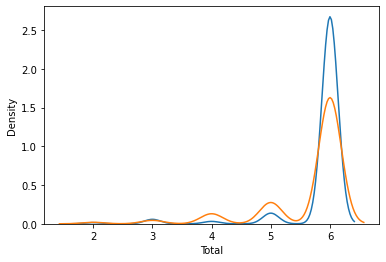

In [65]:
fig, ax = plt.subplots()
sns.kdeplot(d2_df_CA["Total"], ax= ax)
sns.kdeplot(d2_df_FL["Total"], ax= ax)

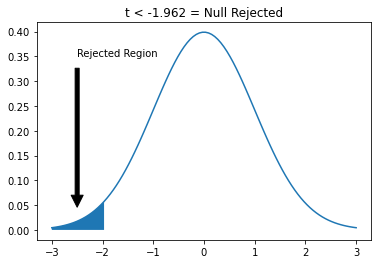

In [68]:
x = np.linspace(0 - 3, 0 + 3, 100)
draw_t_score(x, x<-tacuan2, 0, 1, "t < -1.962 = Null Rejected", -2.5, 0.03, -2.5, 0.35)